In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
file = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [92]:
file.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [93]:
file.corr()["DEATH_EVENT"]

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [94]:
#corelative features: age, ejection_fraction, serum_creatinine, serum_sodium, time

In [95]:
# Actually, the data is inspected in "project1" notebook. 

In [96]:
X = file[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = file['DEATH_EVENT']
X.shape, y.shape  
# define the input and output

((299, 4), (299,))

In [97]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns

np.random.seed(87)
tf.random.set_seed(87)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 87, test_size = 0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 4), (60, 4), (239,), (60,))

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=87, test_size=0.1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((215, 4), (24, 4), (215,), (24,))

In [101]:
X_train = np.float32(X_train)
X_val = np.float32(X_val)
X_test = np.float32(X_test)
y_train = np.float32(y_train)
y_val = np.float32(y_val)
y_test = np.float32(y_test)

## CNN

In [102]:
import tensorflow  as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [121]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(30, (3,), activation='relu',input_shape=(4,1)))
model.add(keras.layers.MaxPooling1D((2,)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(500, activation='relu')) 
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),loss="binary_crossentropy", metrics=['accuracy'])
num_epochs = 20
history = model.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), epochs=num_epochs)

Epoch 1/20
7/7 [==============================] - 1s 28ms/step - loss: 2.3794 - accuracy: 0.4977 - val_loss: 0.7254 - val_accuracy: 0.7083
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 1.9432 - accuracy: 0.6000 - val_loss: 0.7908 - val_accuracy: 0.7083
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 1.9083 - accuracy: 0.5721 - val_loss: 0.8678 - val_accuracy: 0.7083
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 1.6544 - accuracy: 0.5488 - val_loss: 0.7696 - val_accuracy: 0.7083
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 1.4490 - accuracy: 0.6047 - val_loss: 0.6235 - val_accuracy: 0.7083
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 1.3569 - accuracy: 0.5953 - val_loss: 0.6297 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 1.2606 - accuracy: 0.5116 - val_loss: 0.5874 - val_accuracy: 0.7083
Epoch 8/20
7/7 [=================

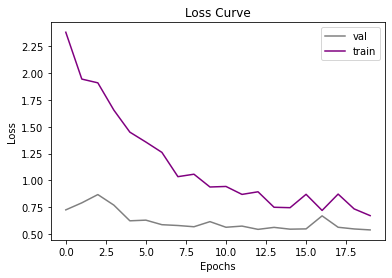

In [122]:
plt.plot(history.history['val_loss'], 'grey', label='val')
plt.plot(history.history['loss'],'purple', label='train')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

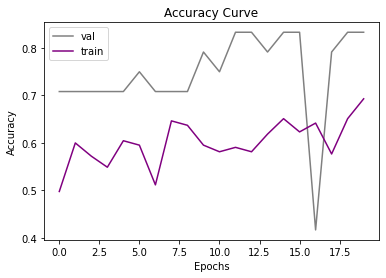

In [123]:
plt.plot(history.history['val_accuracy'],'grey', label='val')
plt.plot(history.history['accuracy'], 'purple', label='train')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [130]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred[: 5]

(60, 1)


array([[0.15174565],
       [0.61132777],
       [0.29509348],
       [0.203323  ],
       [0.46347716]], dtype=float32)

In [125]:
threshold = 0.5
y_pred = [int(item>threshold) for  item in y_pred]

In [126]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [127]:
print(accuracy_score(y_pred, y_test))

0.7333333333333333


In [128]:
print(f1_score(y_pred, y_test))

0.6


In [129]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.63      0.57      0.60        21

    accuracy                           0.73        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.73      0.73      0.73        60



## RNN

RNN with Adam

In [131]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns

np.random.seed(87)
tf.random.set_seed(87)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 87, test_size = 0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 4), (60, 4), (239,), (60,))

In [133]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=87, test_size=0.1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((215, 4), (24, 4), (215,), (24,))

In [134]:
X_train = np.float32(X_train)
X_val = np.float32(X_val)
X_test = np.float32(X_test)
y_train = np.float32(y_train)
y_val = np.float32(y_val)
y_test = np.float32(y_test)

In [135]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(200, input_shape=(4,1))) 
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 200)               40400     
                                                                 
 affine (Dense)              (None, 1)                 201       
                                                                 
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


In [136]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early_stopping] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 1s 39ms/step - loss: 0.7884 - accuracy: 0.5535 - val_loss: 0.6031 - val_accuracy: 0.7083
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.6744 - val_loss: 0.6033 - val_accuracy: 0.7083
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.6744 - val_loss: 0.5941 - val_accuracy: 0.7083
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6196 - accuracy: 0.6744 - val_loss: 0.5934 - val_accuracy: 0.7083
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6175 - accuracy: 0.6744 - val_loss: 0.5770 - val_accuracy: 0.7083
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6055 - accuracy: 0.6744 - val_loss: 0.5570 - val_accuracy: 0.7083
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.5870 - accuracy: 0.6791 - val_loss: 0.5307 - val_accuracy: 0.7083
Epoch 8/20
7/7 [=================

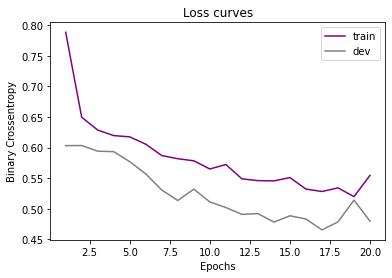

In [137]:
train_loss = history.history['loss']
dev_loss = history.history['val_loss']
epochs = range(1, len(dev_loss)+1)

plt.plot(epochs, train_loss, 'purple', label='train')
plt.plot(epochs, dev_loss, 'grey', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

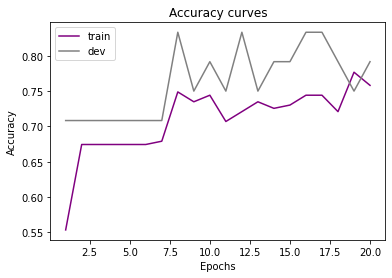

In [138]:
train_accuracy = history.history['accuracy']
dev_accuracy = history.history['val_accuracy']

plt.plot(epochs, train_accuracy, 'purple', label='train')
plt.plot(epochs, dev_accuracy, 'grey', label='dev')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [140]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred[ :5]

(60, 1)


array([[0.21024406],
       [0.72387767],
       [0.21008441],
       [0.20353368],
       [0.36382768]], dtype=float32)

In [142]:
threshold = 0.5
y_pred = [int(item>threshold) for  item in y_pred]

In [143]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(accuracy_score(y_test, y_pred))


0.7666666666666667


In [144]:
print(f1_score(y_test, y_pred))

0.6111111111111113


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        41
         1.0       0.65      0.58      0.61        19

    accuracy                           0.77        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.76      0.77      0.76        60



RNN with SGD

In [146]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(200, input_shape=(4,1))) 
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 200)               40400     
                                                                 
 affine (Dense)              (None, 1)                 201       
                                                                 
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


In [148]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(200, input_shape=(4,1))) 
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 200)               40400     
                                                                 
 affine (Dense)              (None, 1)                 201       
                                                                 
Total params: 40,601
Trainable params: 40,601
Non-trainable params: 0
_________________________________________________________________


In [149]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early_stopping] )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 1s 91ms/step - loss: 0.6777 - accuracy: 0.6000 - val_loss: 0.6131 - val_accuracy: 0.7083
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6285 - accuracy: 0.6744 - val_loss: 0.6053 - val_accuracy: 0.7083
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6294 - accuracy: 0.6744 - val_loss: 0.6038 - val_accuracy: 0.7083
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6271 - accuracy: 0.6744 - val_loss: 0.6050 - val_accuracy: 0.7083
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6270 - accuracy: 0.6744 - val_loss: 0.6044 - val_accuracy: 0.7083
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6269 - accuracy: 0.6744 - val_loss: 0.6021 - val_accuracy: 0.7083
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.6255 - accuracy: 0.6744 - val_loss: 0.6038 - val_accuracy: 0.7083
Epoch 8/20
7/7 [=================

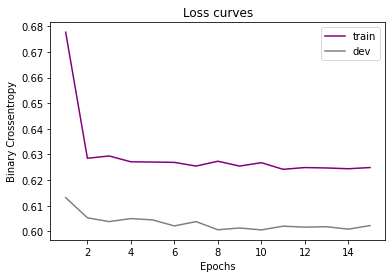

In [150]:
train_loss = history.history['loss']
dev_loss = history.history['val_loss']
epochs = range(1, len(dev_loss)+1)

plt.plot(epochs, train_loss, 'purple', label='train')
plt.plot(epochs, dev_loss, 'grey', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

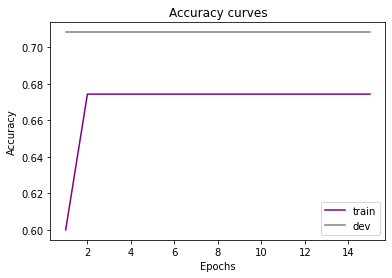

In [151]:
train_accuracy = history.history['accuracy']
dev_accuracy = history.history['val_accuracy']

plt.plot(epochs, train_accuracy, 'purple', label='train')
plt.plot(epochs, dev_accuracy, 'grey', label='dev')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### LSTM

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 87, test_size = 0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 4), (60, 4), (239,), (60,))

In [154]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=87, test_size=0.1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((215, 4), (24, 4), (215,), (24,))

In [155]:
X_train = np.float32(X_train)
X_val = np.float32(X_val)
X_test = np.float32(X_test)
y_train = np.float32(y_train)
y_val = np.float32(y_val)
y_test = np.float32(y_test)

In [156]:
from keras.layers import LSTM
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, return_sequences=True, input_shape=(4,1)))   # define input
model.add(keras.layers.LSTM(100))
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 100)            40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 affine (Dense)              (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [157]:
optimizer = keras.optimizers.Adam(lr= 0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 20
history = model.fit(X_train, y_train, epochs = num_epochs, validation_data=(X_val, y_val), batch_size=100)
history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
3/3 [==============================] - 4s 418ms/step - loss: 0.6298 - accuracy: 0.6744 - val_loss: 0.6013 - val_accuracy: 0.7083
Epoch 2/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6323 - accuracy: 0.6744 - val_loss: 0.6044 - val_accuracy: 0.7083
Epoch 3/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6306 - accuracy: 0.6744 - val_loss: 0.5957 - val_accuracy: 0.7083
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.6264 - accuracy: 0.6744 - val_loss: 0.5931 - val_accuracy: 0.7083
Epoch 5/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6252 - accuracy: 0.6744 - val_loss: 0.5902 - val_accuracy: 0.7083
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6187 - accuracy: 0.6744 - val_loss: 0.5924 - val_accuracy: 0.7083
Epoch 7/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6166 - accuracy: 0.6744 - val_loss: 0.5942 - val_accuracy: 0.7083
Epoch 8/20
3/3 [==========

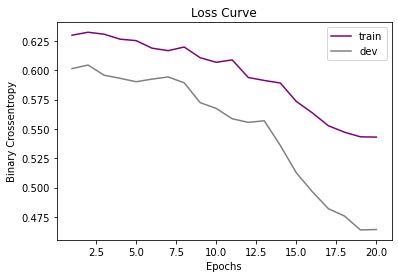

In [158]:
epochs = range(1, num_epochs+1)
train_loss = history.history['loss']
dev_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'purple',label='train')
plt.plot(epochs, dev_loss, 'grey', label='dev')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Loss Curve');

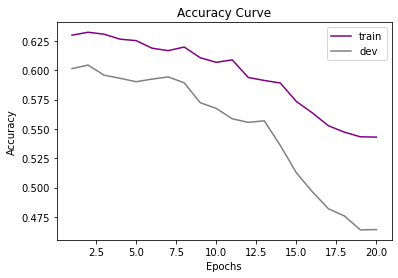

In [159]:
epochs = range(1, num_epochs+1)
train_acc = history.history['accuracy']
dev_acc = history.history['val_accuracy']
plt.plot(epochs, train_loss, 'purple',label='train')
plt.plot(epochs, dev_loss, 'grey', label='dev')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve');

In [162]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred[:5]

(60, 1)


array([[0.09254882],
       [0.53380466],
       [0.08700016],
       [0.08948568],
       [0.2618164 ]], dtype=float32)

In [163]:
threshold = 0.5
y_pred = [int(item>threshold) for  item in y_pred]

In [166]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        51
           1       0.32      0.67      0.43         9

    accuracy                           0.73        60
   macro avg       0.62      0.71      0.63        60
weighted avg       0.84      0.73      0.77        60



with more layers of LSTM

In [167]:
from keras.layers import LSTM
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, return_sequences=True, input_shape=(4,1)))
model.add(keras.layers.LSTM(100, return_sequences=True))
model.add(keras.layers.LSTM(100, return_sequences=True))
model.add(keras.layers.LSTM(100, return_sequences=True))
model.add(keras.layers.LSTM(100))
model.add(keras.layers.Dense(1, activation='sigmoid', name='affine'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 100)            40800     
                                                                 
 lstm_5 (LSTM)               (None, 4, 100)            80400     
                                                                 
 lstm_6 (LSTM)               (None, 4, 100)            80400     
                                                                 
 lstm_7 (LSTM)               (None, 4, 100)            80400     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 affine (Dense)              (None, 1)                 101       
                                                                 
Total params: 362,501
Trainable params: 362,501
Non-t

In [168]:
optimizer = keras.optimizers.Adam(lr= 0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
num_epochs = 20
history = model.fit(X_train, y_train, epochs = num_epochs, validation_data=(X_val, y_val), batch_size=100)
history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
3/3 [==============================] - 10s 961ms/step - loss: 0.6900 - accuracy: 0.5535 - val_loss: 0.6738 - val_accuracy: 0.7083
Epoch 2/20
3/3 [==============================] - 0s 46ms/step - loss: 0.6719 - accuracy: 0.6744 - val_loss: 0.6386 - val_accuracy: 0.7083
Epoch 3/20
3/3 [==============================] - 0s 49ms/step - loss: 0.6484 - accuracy: 0.6744 - val_loss: 0.6060 - val_accuracy: 0.7083
Epoch 4/20
3/3 [==============================] - 0s 48ms/step - loss: 0.6371 - accuracy: 0.6744 - val_loss: 0.6075 - val_accuracy: 0.7083
Epoch 5/20
3/3 [==============================] - 0s 47ms/step - loss: 0.6405 - accuracy: 0.6744 - val_loss: 0.6040 - val_accuracy: 0.7083
Epoch 6/20
3/3 [==============================] - 0s 46ms/step - loss: 0.6307 - accuracy: 0.6744 - val_loss: 0.6116 - val_accuracy: 0.7083
Epoch 7/20
3/3 [==============================] - 0s 48ms/step - loss: 0.6321 - accuracy: 0.6744 - val_loss: 0.6184 - val_accuracy: 0.7083
Epoch 8/20
3/3 [=========

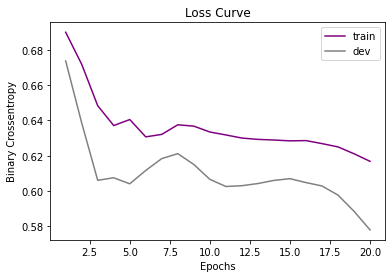

In [169]:
epochs = range(1, num_epochs+1)
train_loss = history.history['loss']
dev_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'purple',label='train')
plt.plot(epochs, dev_loss, 'grey', label='dev')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Loss Curve');

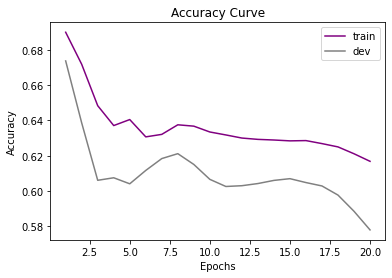

In [170]:
epochs = range(1, num_epochs+1)
train_acc = history.history['accuracy']
dev_acc = history.history['val_accuracy']
plt.plot(epochs, train_loss, 'purple',label='train')
plt.plot(epochs, dev_loss, 'grey', label='dev')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve');

In [171]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred[:5]

(60, 1)


array([[0.269867  ],
       [0.33741874],
       [0.26878378],
       [0.270682  ],
       [0.3124679 ]], dtype=float32)

In [172]:
threshold = 0.5
y_pred = [int(item>threshold) for  item in y_pred]

In [173]:
from sklearn.metrics import classification_report

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        41
         1.0       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
